In [1]:
#importing necessary libraries for my Machine Learning project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
!pip install statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
#Then, loading the datasets for data preparations, understanding my data, clean and visualzation

In [4]:
df = pd.read_csv('SACrimeStats_v2.csv')
print("South African Crime Stats: ", "\n", df.head())
df.describe
df.shape

South African Crime Stats:  
        Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834       3316       3101       3013   
4       5099       4536       3309       2694       2616       2606   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  
0       5285       5937       5600       5335

(30861, 14)

In [5]:
df2 = pd.read_csv('ProPopulation.csv')
print("Province Population Table:", "\n", df2.head())
df.shape

Province Population Table: 
         Province  Population    Area  Density
0        Gauteng    12272263   18178    675.1
1  Kwazulu/Natal    10267300   94361    108.8
2     Mpumalanga     4039939   76495     52.8
3   Western Cape     5822734  129462     45.0
4        Limpopo     5404868  125755     43.0


(30861, 14)

In [6]:
#For selecting which columns to keep, and adding 2 columns

In [7]:
crime = df.melt(
   id_vars = ["Province", "Station", "Category"],
    var_name = "Year",
    value_name =  "CrimeCount"
)
crime.head

<bound method NDFrame.head of             Province            Station                           Category  \
0       Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1            Gauteng        Jhb Central  All theft not mentioned elsewhere   
2       Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3         Free State          Park Road  All theft not mentioned elsewhere   
4            Gauteng   Pretoria Central  All theft not mentioned elsewhere   
...              ...                ...                                ...   
339466  Western Cape             Belhar  All theft not mentioned elsewhere   
339467       Gauteng         Moffatview  All theft not mentioned elsewhere   
339468  Western Cape             Belhar                 Drug-related crime   
339469  Western Cape          Lentegeur  All theft not mentioned elsewhere   
339470  Western Cape          Lentegeur                 Drug-related crime   

             Year  CrimeCount  
0

In [8]:
crime["Year"] = crime["Year"].str.split("-").str[0].astype(int)
crime.describe

<bound method NDFrame.describe of             Province            Station                           Category  \
0       Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1            Gauteng        Jhb Central  All theft not mentioned elsewhere   
2       Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3         Free State          Park Road  All theft not mentioned elsewhere   
4            Gauteng   Pretoria Central  All theft not mentioned elsewhere   
...              ...                ...                                ...   
339466  Western Cape             Belhar  All theft not mentioned elsewhere   
339467       Gauteng         Moffatview  All theft not mentioned elsewhere   
339468  Western Cape             Belhar                 Drug-related crime   
339469  Western Cape          Lentegeur  All theft not mentioned elsewhere   
339470  Western Cape          Lentegeur                 Drug-related crime   

        Year  CrimeCount  
0 

In [9]:
crimeDF = crime.merge(df2, on="Province", how="left")
crimeDF["CrimeRate_per100k"] = (
    (crimeDF["CrimeCount"] / crimeDF["Population"]) * 100000
)
crimeDF.head(10)

,Province,Station,Category,Year,CrimeCount,Population,Area,Density,CrimeRate_per100k
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2005,6692,5822734,129462,45.0,114.928829
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,2005,6093,12272263,18178,675.1,49.648545
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2005,5341,5822734,129462,45.0,91.726670
3,Free State,Park Road,All theft not mentioned elsewhere,2005,5108,2745590,129825,21.1,186.043801
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2005,5099,12272263,18178,675.1,41.548979
5,North West,Rustenburg,All theft not mentioned elsewhere,2005,4239,3509953,104882,33.5,120.770848
6,Kwazulu/Natal,Durban Central,All theft not mentioned elsewhere,2005,4162,10267300,94361,108.8,40.536460
7,Gauteng,Brooklyn,All theft not mentioned elsewhere,2005,3931,12272263,18178,675.1,32.031582
8,Gauteng,Booysens,All theft not mentioned elsewhere,2005,3681,12272263,18178,675.1,29.994468
9,Gauteng,Hillbrow,All theft not mentioned elsewhere,2005,3489,12272263,18178,675.1,28.429964


In [10]:
crimeDF = crimeDF.drop_duplicates()
crimeDF.head(10)

,Province,Station,Category,Year,CrimeCount,Population,Area,Density,CrimeRate_per100k
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2005,6692,5822734,129462,45.0,114.928829
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,2005,6093,12272263,18178,675.1,49.648545
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2005,5341,5822734,129462,45.0,91.726670
3,Free State,Park Road,All theft not mentioned elsewhere,2005,5108,2745590,129825,21.1,186.043801
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2005,5099,12272263,18178,675.1,41.548979
5,North West,Rustenburg,All theft not mentioned elsewhere,2005,4239,3509953,104882,33.5,120.770848
6,Kwazulu/Natal,Durban Central,All theft not mentioned elsewhere,2005,4162,10267300,94361,108.8,40.536460
7,Gauteng,Brooklyn,All theft not mentioned elsewhere,2005,3931,12272263,18178,675.1,32.031582
8,Gauteng,Booysens,All theft not mentioned elsewhere,2005,3681,12272263,18178,675.1,29.994468
9,Gauteng,Hillbrow,All theft not mentioned elsewhere,2005,3489,12272263,18178,675.1,28.429964


In [11]:
crimeDF.isnull().sum
#crimeDF.info

<bound method DataFrame.sum of         Province  Station  Category   Year  CrimeCount  Population   Area  \
0          False    False     False  False       False       False  False   
1          False    False     False  False       False       False  False   
2          False    False     False  False       False       False  False   
3          False    False     False  False       False       False  False   
4          False    False     False  False       False       False  False   
...          ...      ...       ...    ...         ...         ...    ...   
339466     False    False     False  False       False       False  False   
339467     False    False     False  False       False       False  False   
339468     False    False     False  False       False       False  False   
339469     False    False     False  False       False       False  False   
339470     False    False     False  False       False       False  False   

        Density  CrimeRate_per100k  
0      

In [12]:
crimeDF.info

<bound method DataFrame.info of             Province            Station                           Category  \
0       Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1            Gauteng        Jhb Central  All theft not mentioned elsewhere   
2       Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3         Free State          Park Road  All theft not mentioned elsewhere   
4            Gauteng   Pretoria Central  All theft not mentioned elsewhere   
...              ...                ...                                ...   
339466  Western Cape             Belhar  All theft not mentioned elsewhere   
339467       Gauteng         Moffatview  All theft not mentioned elsewhere   
339468  Western Cape             Belhar                 Drug-related crime   
339469  Western Cape          Lentegeur  All theft not mentioned elsewhere   
339470  Western Cape          Lentegeur                 Drug-related crime   

        Year  CrimeCount  Popul

In [13]:
def create_master_dataset():
    master = crime.merge(df2, on="Province", how="left")
    master.head(10)

    print(f"✓ Master dataset created: {master.shape}")
    return master

masterDF = create_master_dataset()

✓ Master dataset created: (339471, 8)


In [14]:

Year = [col for col in masterDF.columns if col.startswith("20")]
crime_counts = masterDF[Year].to_numpy()
masterDF["CrimeCount"] = masterDF[Year].sum(axis=1)
crime_by_province = masterDF.groupby("Province")["CrimeCount"].sum().reset_index()


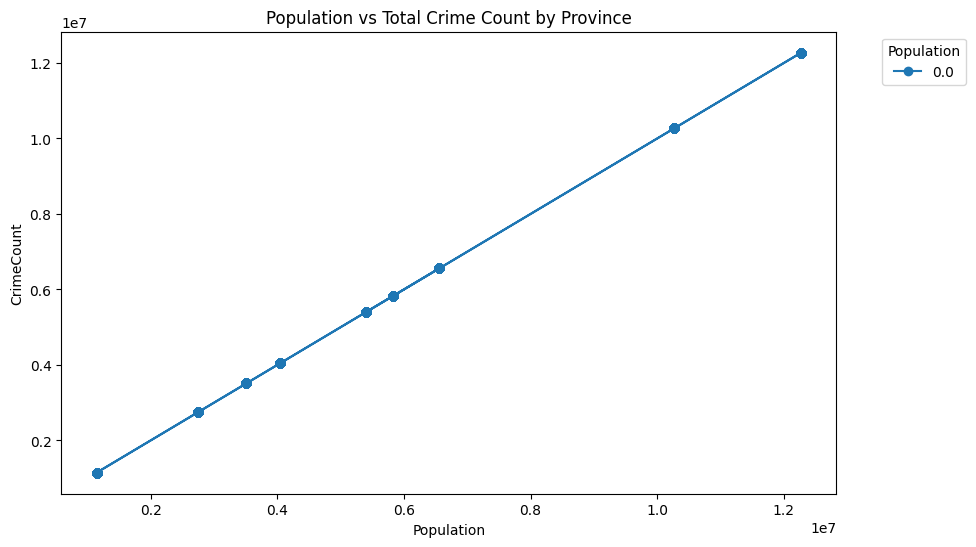

In [15]:


plt.figure(figsize=(10,6))
for CrimeCount in masterDF["CrimeCount"].unique():
    subset = crimeDF[crimeDF["CrimeCount"] == CrimeCount]
    plt.plot(subset["Population"], subset["Population"], marker="o", label=CrimeCount)

plt.title("Population vs Total Crime Count by Province")
plt.xlabel("Population")
plt.ylabel("CrimeCount")
plt.legend(title="Population", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()




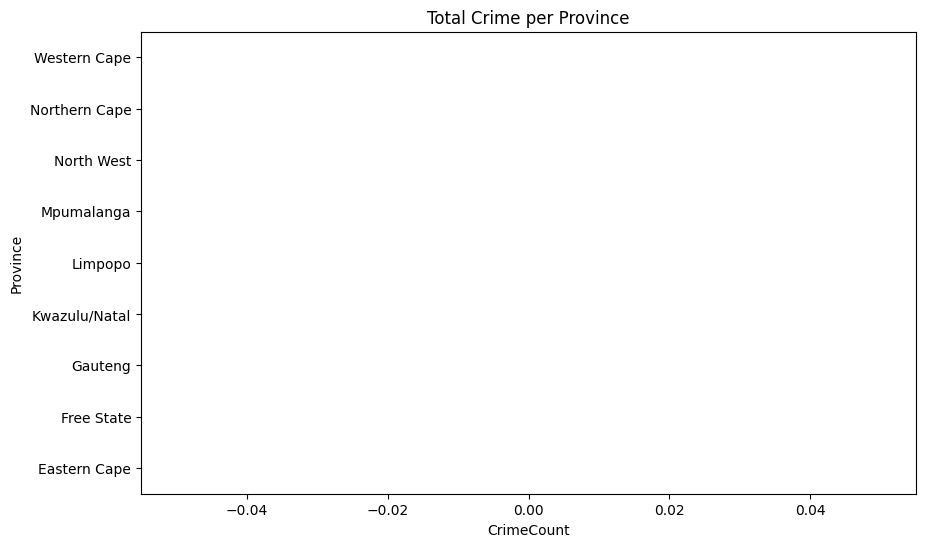

In [16]:

# --- Histogram ---
plt.figure(figsize=(10,6))
crime_by_province.groupby("Province")["CrimeCount"].sum().sort_values().plot(kind="barh")
plt.title("Total Crime per Province")
plt.xlabel("CrimeCount")
plt.ylabel("Province")
plt.show()


In [17]:

masterDF = crimeDF.copy()

threshold = masterDF["CrimeCount"].quantile(0.75)
masterDF["Hotspot"] = (masterDF["CrimeCount"] >= threshold).astype(int)


masterDF_encoded = pd.get_dummies(masterDF[["Province", "Category"]], drop_first=True)

X = pd.concat([masterDF_encoded, masterDF[["CrimeCount", "Year", "Population", "CrimeRate_per100k"]]], axis=1)
y = masterDF["Hotspot"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     63418
           1       1.00      1.00      1.00     21450

    accuracy                           1.00     84868
   macro avg       1.00      1.00      1.00     84868
weighted avg       1.00      1.00      1.00     84868

Confusion Matrix:
 [[63418     0]
 [    0 21450]]


In [18]:
national_crime_ts = masterDF.groupby("Year")["CrimeCount"].sum().reset_index()
national_crime_ts.columns = ["Year", "CrimeCount"]

# Ensure 'Year' is sorted for time series
national_crime_ts = national_crime_ts.sort_values(by="Year")
model = ExponentialSmoothing(national_crime_ts["CrimeCount"], trend="add", seasonal=None)
fit = model.fit()

# Forecast next 5 years
last_year = national_crime_ts["Year"].max()
forecast_years = list(range(last_year + 1, last_year + 6))
forecast_values = fit.forecast(steps=5)

# Display forecast
forecast_df = pd.DataFrame({
    "Year": forecast_years,
    "ForecastedCrimes": forecast_values
})
print("\nNational Crime Forecast for the next 5 years:")
print(forecast_df)


National Crime Forecast for the next 5 years:
    Year  ForecastedCrimes
11  2016      2.183811e+06
12  2017      2.190207e+06
13  2018      2.196604e+06
14  2019      2.203001e+06
15  2020      2.209397e+06


In [21]:
#Step-by-Step Design for a 3D Grid-Based Area
print("1. I have to define the area of interest using coordinates(latitude, longitude) to define the bounderies of the regiom, like cities or provinces. Dividing the area into 1km x 1km grid cells using geospatial libraries for example, geopandas, shapely, or pyproj. 2. Then, i create the 3D Grid, by each grid cell representing a volume in space.  X and Y for horizontal dimensions(1kmx1km), Z for altitube levels(like, 0-120m for drone flight). This is represented as a 3D matrix or a list of grid cell objects with coordinates and altitude ranges.3. Now I Assign Crime Hotspots as POIs using the merged dataset masterDF to identify hotspots. Filter provinces or stations with higher CrimeCount. Map their locations to corresponding grid cells. For each POI can be tagged with: Coordinates, Crime type, Severity level, Recommended drone action (e.g., hover, scan, alert) To Simulate Drone Behavior I'd Use a simulation engine or custom logic to: Navigate drones through the grid. Prioritize POIs based on crime severity. Avoid restricted zones or low battery areas.")





1. I have to define the area of interest using coordinates(latitude, longitude) to define the bounderies of the regiom, like cities or provinces. Dividing the area into 1km x 1km grid cells using geospatial libraries for example, geopandas, shapely, or pyproj. 2. Then, i create the 3D Grid, by each grid cell representing a volume in space.  X and Y for horizontal dimensions(1kmx1km), Z for altitube levels(like, 0-120m for drone flight). This is represented as a 3D matrix or a list of grid cell objects with coordinates and altitude ranges.3. Now I Assign Crime Hotspots as POIs using the merged dataset masterDF to identify hotspots. Filter provinces or stations with higher CrimeCount. Map their locations to corresponding grid cells. For each POI can be tagged with: Coordinates, Crime type, Severity level, Recommended drone action (e.g., hover, scan, alert) To Simulate Drone Behavior I'd Use a simulation engine or custom logic to: Navigate drones through the grid. Prioritize POIs based on